# 第８章 サポートベクトルマシン

## 8.1 最適な境界

## 8.2 最適化の理論

## 8.3 サポートベクトルマシンの解

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn #正規乱数

In [12]:
import cvxopt
from cvxopt import matrix

In [13]:
a=randn(1);b=randn(1)
n=100
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]+0.1*randn(n))
y=y.reshape(-1,1)  #形を明示してわたす必要がある

In [14]:
def svm_1(X,y,C):
    eps=0.0001
    n=X.shape[0]
    P=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            P[i,j]=np.dot(X[i,:],X[j,:])*y[i]*y[j]
    #パッケージにあるmatrix関数を使って指定する必要がある
    P=matrix(P+np.eye(n)*eps)                
    A=matrix(-y.T.astype(np.float))
    b=matrix(np.array([0]).astype(np.float))
    h=matrix(np.array([C]*n+[0]*n).reshape(-1,1).astype(np.float))
    G=matrix(np.concatenate([np.diag(np.ones(n)),np.diag(-np.ones(n))]))       
    q=matrix(np.array([-1]*n).astype(np.float))
    res=cvxopt.solvers.qp(P,q,A=A, b=b,G=G, h=h)    # ソルバーの実行
    alpha=np.array(res['x'])  #xが本文中のalphaに対応
    beta=((alpha*y).T@X).reshape(2,1)
    index = (eps < alpha[:, 0]) & (alpha[:, 0] < C - eps)
    beta_0=np.mean(y[index]-X[index,:]@beta)
    return {'beta':beta, 'beta_0':beta_0}

In [15]:
n=10
matrix(np.concatenate([np.diag(np.ones(2)),np.diag(-np.ones(2))]))

<4x2 matrix, tc='d'>

     pcost       dcost       gap    pres   dres
 0: -2.0069e+02 -1.0360e+04  3e+04  1e+00  9e-15
 1: -7.1878e+01 -4.2350e+03  6e+03  1e-01  1e-14
 2: -4.9645e+01 -6.7161e+02  7e+02  1e-02  4e-14
 3: -1.2510e+02 -2.9873e+02  2e+02  3e-03  1e-14
 4: -1.4643e+02 -2.5888e+02  1e+02  2e-03  9e-15
 5: -1.6228e+02 -2.2570e+02  7e+01  7e-04  6e-15
 6: -1.7028e+02 -2.1153e+02  4e+01  3e-04  6e-15
 7: -1.7702e+02 -2.0174e+02  3e+01  1e-04  6e-15
 8: -1.8287e+02 -1.9153e+02  9e+00  4e-05  7e-15
 9: -1.8523e+02 -1.8834e+02  3e+00  6e-06  6e-15
10: -1.8658e+02 -1.8666e+02  8e-02  1e-07  6e-15
11: -1.8661e+02 -1.8661e+02  9e-04  2e-09  7e-15
12: -1.8661e+02 -1.8661e+02  9e-06  2e-11  7e-15
Optimal solution found.


{'beta': array([[-2.6643662 ],
        [-3.18911546]]), 'beta_0': -0.48734660376992944}

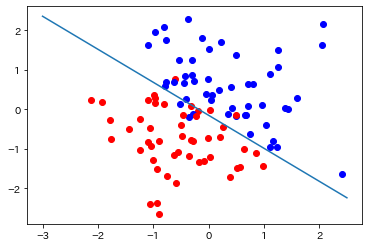

In [16]:
a=randn(1);b=randn(1)
n=100
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]+0.1*randn(n))
y=y.reshape(-1,1)  #形を明示してわたす必要がある
for i in range(n):
    if y[i]==1:
        plt.scatter(X[i,0],X[i,1],c="red")
    else :
        plt.scatter(X[i,0],X[i,1],c="blue")
res=svm_1(X,y,C=10)
def f(x):
    return -res['beta_0']/res['beta'][1]-x*res['beta'][0]/res['beta'][1]
x_seq=np.arange(-3,3,0.5)
plt.plot(x_seq,f(x_seq))
res

## 8.4 カーネルを用いたサポートベクトルマシンの拡張

In [17]:
def K_linear(x,y):
    return x.T@y
def K_poly(x,y):
    return (1+x.T@y)**2

In [18]:
def svm_2(X,y,C,K):
    eps=0.0001
    n=X.shape[0]
    P=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            P[i,j]=K(X[i,:],X[j,:])*y[i]*y[j]
    #パッケージにあるmatrix関数を使って指定する必要がある
    P=matrix(P+np.eye(n)*eps)                
    A=matrix(-y.T.astype(np.float))
    b=matrix(np.array([0]).astype(np.float))
    h=matrix(np.array([C]*n+[0]*n).reshape(-1,1).astype(np.float))
    G=matrix(np.concatenate([np.diag(np.ones(n)),np.diag(-np.ones(n))]))       
    q=matrix(np.array([-1]*n).astype(np.float))
    res=cvxopt.solvers.qp(P,q, A=A, b=b,G=G, h=h)
    alpha=np.array(res['x'])  #xが本文中のalphaに対応
    beta=((alpha*y).T@X).reshape(2,1)
    index = (eps < alpha[:, 0]) & (alpha[:, 0] < C - eps)
    beta_0=np.mean(y[index]-X[index,:]@beta)
    return {'alpha':alpha, 'beta':beta, 'beta_0':beta_0}

In [19]:
# 実行
a=3;b=-1
n=200
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]**2+0.3*randn(n))
y=y.reshape(-1,1)

In [20]:
def plot_kernel(K,line): #引数lineで線の種類を指定する
    res=svm_2(X,y,1,K)
    alpha=res['alpha'][:,0]
    beta_0=res['beta_0']
    def f(u,v):
        S=beta_0
        for i in range(X.shape[0]):
            S=S+alpha[i]*y[i]*K(X[i,:],[u,v])
        return S[0]
    uu=np.arange(-2,2,0.1); vv=np.arange(-2,2,0.1); ww=[]
    for v in vv:
        w=[]
        for u in uu:
            w.append(f(u,v))
        ww.append(w)
    plt.contour(uu,vv,ww,levels=0,linestyles=line)

     pcost       dcost       gap    pres   dres
 0: -6.9367e+01 -4.9790e+02  3e+03  3e+00  1e-14
 1: -4.4911e+01 -3.2352e+02  5e+02  4e-01  2e-14
 2: -3.3165e+01 -1.4802e+02  2e+02  1e-01  1e-14
 3: -2.6197e+01 -5.2125e+01  4e+01  3e-02  7e-15
 4: -2.7091e+01 -3.1259e+01  6e+00  3e-03  6e-15
 5: -2.7876e+01 -2.8779e+01  1e+00  5e-04  6e-15
 6: -2.8096e+01 -2.8342e+01  3e-01  9e-05  5e-15
 7: -2.8181e+01 -2.8204e+01  2e-02  3e-06  7e-15
 8: -2.8191e+01 -2.8192e+01  1e-03  1e-07  5e-15
 9: -2.8191e+01 -2.8191e+01  2e-05  2e-09  5e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.5427e+01 -4.8751e+02  2e+03  3e+00  4e-15
 1: -5.5963e+01 -3.1674e+02  5e+02  4e-01  4e-15
 2: -4.4063e+01 -9.3745e+01  6e+01  3e-02  9e-15
 3: -4.9720e+01 -6.0749e+01  1e+01  6e-03  3e-15
 4: -5.1830e+01 -5.7179e+01  6e+00  2e-03  2e-15
 5: -5.2771e+01 -5.5602e+01  3e+00  1e-03  2e-15
 6: -5.3517e+01 -5.4333e+01  9e-01  2e-04  2e-15
 7: -5.3710e+01 -5.4033e+01  3e-01  7e-05  2e-1

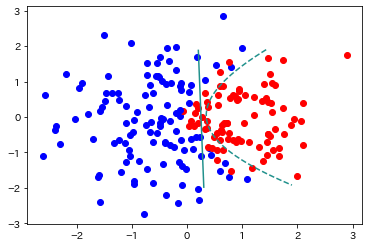

In [21]:
for i in range(n):
    if y[i]==1:
        plt.scatter(X[i,0],X[i,1],c="red")
    else:
        plt.scatter(X[i,0],X[i,1],c="blue")
plot_kernel(K_poly,line="dashed")
plot_kernel(K_linear,line="solid")

In [22]:
import sklearn
from sklearn import svm

In [23]:
x=randn(200,2)
x[0:100,]=x[0:100,]+2
x[100:150,]=x[100:150,]-2
y=np.concatenate(([1 for i in range(150)],[2 for i in range(50)]))

In [24]:
train=np.random.choice(200, 100, replace=False)
test=list(set(range(200))-set(train))
res_svm = svm.SVC(kernel="rbf",gamma=1,C=100)  #チューニングなしのSVM

In [25]:
res_svm.fit(x[train,],y[train])  #実行

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
res_svm.predict(x[test,])      #テストデータの予測結果

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2])

In [27]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


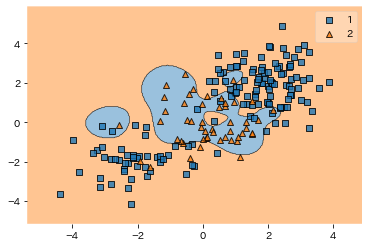

In [28]:
plot_decision_regions(x,y,clf=res_svm)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = {'C': [0.1, 1,10, 100, 1000],  'gamma' : [0.5, 1, 2, 3, 4]}

In [31]:
tune = GridSearchCV(svm.SVC(), grid, cv=10)
tune.fit(x[train,],y[train])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.5, 1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
tune.best_params_   #C=1, gamma=0.5が最適だとわかる

{'C': 1, 'gamma': 0.5}

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x=iris.data
y=iris.target
train=np.random.choice(150, 120, replace=False)
test=np.ones(150,dtype=bool)
test[train]=False

In [34]:
iris_svm = svm.SVC(kernel="rbf",gamma=1,C=10)
iris_svm.fit(x[train,],y[train])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
# 2章で定義した関数table_count (再掲)
def table_count(m,u,v):
    n=u.shape[0]
    count=np.zeros([m,m])
    for i in range(n):
        count[int(u[i]),int(v[i])]+=1
    return(count)

In [36]:
y_pre=iris_svm.predict(x[test,])
table_count(3,y[test],y_pre)

array([[ 9.,  0.,  0.],
       [ 0.,  9.,  1.],
       [ 0.,  0., 11.]])